# Variables en Python

## 1 Variables, literales e identificadores

* En Python, una **variable** no guarda el valor directamente, es solo un **nombre** que apunta a un **objeto** en memoria.

* Un **literal** es el valor escrito directamente en el código: `42`, `"AAPL"`, `True`.

* Un **identificador** es el nombre que usamos para referirnos a ese valor, por ejemplo, `balance = 311`.

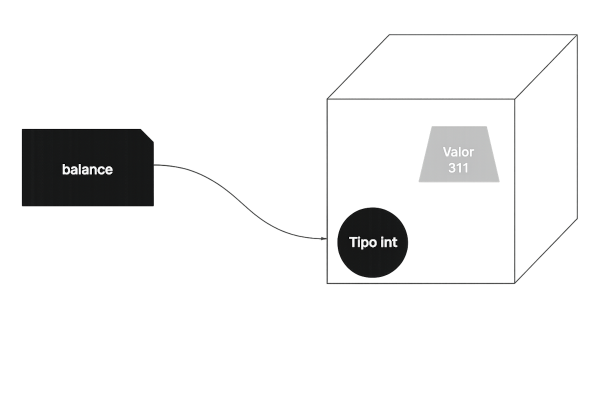


**En el esquema anterior:**

* El rectángulo de la izquierda representa la variable (balance),

* La flecha representa la referencia,

* Y el cubo representa el objeto en memoria,
que tiene un tipo (int) y un valor (311).


### Palabras clave (keywords)

Python reserva ciertas palabras que no se pueden usar como nombres de variable (identificador).

Algunos ejemplos:
False, True, None, and, or, not, if, else, for, while, break, continue, class, def, return, import, from, try, except, finally, with, as, global, nonlocal, pass, yield, lambda.

Para ver la lista completa:
```
import keyword
print(keyword.kwlist)
```

### Reglas de nombres de variables

* Deben comenzar con letra o _.
* Solo pueden contener letras, números y _.
* Son sensibles a mayúsculas/minúsculas (precio ≠ Precio).
* No pueden coincidir con palabras clave.

**Ejemplos inválidos:**
2precio
precio$
class


### Convenciones de estilo (PEP 8)

* snake_case para variables y funciones. Ejemplo: precio_cierre, senal_entrada.

* CamelCase para clases. Ejemplo: EstrategiaTrading, OrdenCompra.

* MAYÚSCULAS para constantes. Ejemplo: CAPITAL_INICIAL = 10000.

* Evitar nombres de una sola letra (excepto en bucles cortos).

* Elegir nombres descriptivos que reflejen el uso real.

### Inicialización de variables

Es importante inicializar las variables antes de ser utilizadas, de lo contrario se elevará un error del tipo NameError reportando que el nombre de la variable no esta definido.



***
## 2. Tipos de datos en Python

Python ofrece varios tipos de datos ya listos para usar. A continuación se muestra una tabla que resume todos los tipos de datos presentes en el núcleo de Python.

|Grupo |Tipo |Ejemplo |Mutable |
|-----------|-------|--------|--------|
| Numéricos  | int       | 34          | no         |
|            | float     | 1.62      | no         |
|            | complex   | 2+8j         | no         |
|Booleanos | bool | True, False | no|
| Secuencias | list      | [1, 2, 3]          | si         |
|            | tuple     | (3, 4, True)       | no         |
|            | range     | range(5)           | no         |
| Texto      | str       | "casa" | no         |
| Binarios   | bytes     | b'coche'           | no         |
|            | bytearray | bytearray(b"Hola") | si         |
| Conjuntos  | set       |  {3, True, 5}       | si         |
|            | frozenset |  frozenset([1, 2])  | no         |
| Mapas      | dict      | {'x': 1, 'y': 2}   | si         |



### Uso práctico en trading

| Grupo      | Ejemplo de uso en trading                          |
|------------|----------------------------------------------------|
| Numéricos  | Precios, retornos, cantidad de acciones            |
| Booleanos  | Señales de entrada/salida (`True` / `False`)       |
| Secuencias | Serie de precios (`list`), parámetros fijos (`tuple`) |
| Texto      | Símbolos de ticker (`"AAPL"`, `"MSFT"`)            |
| Binarios   | Lectura/escritura de datos de mercado en binario   |
| Conjuntos  | Tickers únicos en cartera (`{"AAPL", "MSFT"}`)     |
| Mapas      | Cartera como diccionario (`{"AAPL": 10, "MSFT": 5}`) |


***

## 3. Modelo de memoria y mutabilidad

Como ya vimos anteriormente, en Python, las **variables son referencias** (nombres) que apuntan a **objetos** en memoria.

Cada objeto tiene:

- **Identidad**: id(obj) (dirección única durante su vida).
- **Tipo**:  define su comportamiento (type(obj)).
- **Valor**: su contenido (mutable o inmutable).

### Igualdad vs identidad

* `==` compara valores
* `is` compara identidad (si son **el mismo** tipo de objeto).

### Ciclo de vida del objeto

- **Conteo de referencias**: el intérprete lleva un contador por objeto (cuántos nombres/estructuras lo referencian).
- **Recolección de basura (GC)**: cuando el contador llega a **0**, el objeto es elegible para liberar memoria.

- **Borrar nombres**: `del nombre` quita la referencia del nombre al objeto; si era la última, el objeto puede ser liberado.

```python
a = [1, 2]; b = a      # dos referencias al mismo objeto
del a                  # queda 'b' → el objeto sigue vivo
# del b                # si borrás b, ya no hay referencias → el objeto se libera
```

### Mutabilidad

La **mutabilidad** define si un objeto puede cambiar su contenido después de creado.  
No depende de la variable, sino del **tipo de objeto**.

- **Inmutables:** no cambian; cualquier modificación crea un nuevo objeto.  
  (`int`, `float`, `bool`, `str`, `tuple`, `frozenset`)

- **Mutables:** pueden modificarse en el lugar, manteniendo el mismo `id()`.  
  (`list`, `dict`, `set`, `bytearray`)




```python
# Inmutable (int)
x = 10
y = x
y += 1
print(x, y)         # 10, 11
print(id(x), id(y)) # ids distintos (nuevo objeto creado)

# Mutable (list)
a = [1, 2, 3]
b = a
b.append(4)
print(a)            # [1, 2, 3, 4]
print(a is b)       # True (mismo objeto en memoria)
```

### Situaciones comunes que generan problemas

* 1. Asignar una lista a otra variable:
  Ambas comparten el mismo objeto, un cambio se refleja en ambas.

* 2. Pasar una lista o diccionario a una función:
  Si se modifica dentro de la función, el cambio afecta al original.

* 3. Usar un valor mutable como argumento por defecto:
  El mismo objeto se reutiliza entre llamadas.

* 4. Copiar sin querer solo el contenedor (copia superficial):
  Los objetos internos permanecen compartidos.

* 5. Modificar una estructura mientras se itera sobre ella:
  Puede producir errores o resultados inesperados.


**Ejemplo:**

```python
def agregar_operacion(historial=[]):
    historial.append("compra")
    return historial

print(agregar_operacion())  # ['compra']
print(agregar_operacion())  # ['compra', 'compra']  ← inesperado
```


### Copias

* **Copia superficial:** duplica el contenedor, pero comparte elementos internos. Útil si los elementos son inmutables.

* **Copia profunda:** duplica todo el árbol interno (con copy.deepcopy).

```python
import copy

# Tenemos una lista de listas (estructura anidada)
original = [[1, 2], [3, 4]]

# Copia superficial: solo duplica el "contenedor"
shallow = original.copy()

# Copia profunda: duplica todo, también las sublistas
deep = copy.deepcopy(original)

# Modificamos un elemento dentro de la primera sublista
original[0].append(99)

print("original:", original)
print("shallow :", shallow)
print("deep    :", deep)
```
original: [[1, 2, 99], [3, 4]]
shallow : [[1, 2, 99], [3, 4]]
deep    : [[1, 2], [3, 4]]

**Interpretación:**

shallow apunta a nuevas listas externas, pero sus sublistas internas siguen siendo las mismas de original. Por eso también aparece el 99.

deep crea copias independientes de las sublistas, así que no se ve afectado.

```python

```

***
## 4. Tipos numéricos

Python ofrece tres tipos numéricos básicos:

| Tipo | Descripción | Ejemplo |
|------|--------------|---------|
| `int` | Enteros sin límite de tamaño | `42`, `-17`, `1_000_000` |
| `float` | Números en coma flotante (decimales) | `3.14`, `-0.5`, `2.7e3` |
| `complex` | Números complejos con parte real e imaginaria | `2+3j`, `1j` |


### Enteros (`int`)

- Representan **números exactos** sin límite de tamaño (solo limitado por la memoria).
- Pueden escribirse con guiones bajos `_` para mayor legibilidad:
  ```python
  capital = 1_000_000

### Flotantes (float)

Representan números reales con parte decimal (64 bits, precisión doble IEEE 754).
Pueden escribirse con notación científica:

tasa = 2.5e-3   # 0.0025

**Importante:** los float no siempre son exactos:

0.1 + 0.2 == 0.3   # False

Esto se debe a cómo se almacenan los decimales en binario.
Si necesitás precisión exacta (por ejemplo en dinero), usá:

```python
from decimal import Decimal
precio = Decimal("0.1") + Decimal("0.2")
```

### Números complejos

* Se escriben como a + bj, donde a es la parte real y b la imaginaria.

* Python incluye soporte nativo para cálculos complejos:

* En trading raramente se usan, salvo en análisis de señales (FFT o transformadas de Hilbert).

### Conversión entre tipos

```python
float(10)      # 10.0
int(10.8)      # 10
complex(3, 2)  # (3+2j)
```

### Operadores númericos

| Operador | Descripción     | Ejemplo  | Resultado |
| -------- | --------------- | -------- | --------- |
| `+`      | Suma            | `5 + 3`  | `8`       |
| `-`      | Resta           | `10 - 4` | `6`       |
| `*`      | Multiplicación  | `6 * 2`  | `12`      |
| `/`      | División real   | `5 / 2`  | `2.5`     |
| `//`     | División entera | `5 // 2` | `2`       |
| `%`      | Resto           | `7 % 3`  | `1`       |
| `**`     | Potencia        | `2 ** 3` | `8`       |


***

## 5. Tipo de dato booleano

### Introducción
El tipo **booleano** representa los valores lógicos **Verdadero** o **Falso**.  
En Python existen exactamente dos constantes:

```python
True
False
```

### Conversión a booleano

Cualquier objeto en Python puede evaluarse como verdadero (True) o falso (False).

```python
bool(0), bool(''), bool(None), bool([]), bool({})
# → False False False False False

bool(1), bool(-3), bool('AAPL'), bool([1, 2])
# → True True True True
```

### Regla general:

Todos los objetos son verdaderos salvo que:

* Sean numéricamente cero (0, 0.0, 0j),

* Estén vacíos ('', [], set(), dict()), o

* Sean False o None.

### Operadores lógicos

| Operador | Ejemplo   | Significado                                        |
| -------- | --------- | -------------------------------------------------- |
| `and`    | `x and y` | Devuelve `x` si es falso; de lo contrario `y`.     |
| `or`     | `x or y`  | Devuelve `x` si es verdadero; de lo contrario `y`. |
| `not`    | `not x`   | Invierte el valor lógico.                          |


**Importante:**

Los operadores and y or no devuelven necesariamente True o False,
sino uno de los operandos.

```python
24 and 89 and 2     # → 2
0 or 'libro' or 99  # → 'libro'
```

### Cortocircuito lógico

Python evalúa solo lo necesario en una expresión lógica.
Si en una cadena and aparece un valor falso, se detiene (cortocircuito) y devuelve ese valor.
En or, se detiene al encontrar el primer verdadero.

```python
0 or 'libro' or 24 or x
# → 'libro'  (no evalúa x)

16 and True and 0 or x
# → 0        (tampoco evalúa x)
```

### Booleanos en trading

En trading, los booleanos suelen representar condiciones de entrada o salida:

```python
precio = 105
sma = 100

senal_entrada = precio > sma      # True si el precio supera la media
senal_salida  = precio < sma * 0.98

if senal_entrada:
    print("Comprar")
```

### Operaciones a nivel bits con enteros

| Operador | Ejemplo | Descripción |
|----------|---------|-------------|
| \| | x \| y | Disyunción lógica inclusiva (or) |
| ^ | x ^ y | Disyunción lógica exclusiva (xor) |
| & | x & y | Conjunción lógica (and) |
| << | x << n | Movimiento de n bits a la izquierda |
| >> | x >> n | Movimiento de n bits a la derecha |
| ~ |~x | Operación complemento (not) |


***
## Ejercicio

**Objetivo:** aplicar los conceptos vistos (variables, tipos, mutabilidad, numéricos y booleanos)  
en un mini escenario de análisis de precios.

### Contexto
Queremos simular de forma simple el seguimiento de un activo durante tres días.

Cada día registramos un precio y calculamos si hay **señal de compra** (precio sube respecto al día anterior).


### Paso 1 — Registro de precios
1. Crear tres variables:  
   `precio_dia1 = 100.0`  
   `precio_dia2 = 105.5`  
   `precio_dia3 = 103.0`

2. Mostrar sus tipos con `type()`  
   (¿son enteros, flotantes o booleanos?)


### Paso 2 — Cálculos básicos
1. Calcular el **retorno diario** en porcentaje entre cada día:  
   `(precio_dia2 / precio_dia1 - 1) * 100`  
   `(precio_dia3 / precio_dia2 - 1) * 100`

2. Convertir cada resultado a `float` explícitamente.

3. Recortar a dos decimales (`round(valor, 2)`).


### Paso 3 — Señales booleanas
1. Crear dos variables booleanas:  
   `sube_dia2 = precio_dia2 > precio_dia1`  
   `sube_dia3 = precio_dia3 > precio_dia2`

2. Mostrar el resultado con f-strings:  
   ```python
   print(f"Día 2 sube: {sube_dia2}")
   print(f"Día 3 sube: {sube_dia3}")

### Paso 4 — Mutabilidad y copia

Crear una lista con los precios:
precios = [precio_dia1, precio_dia2, precio_dia3]

Crear otra referencia alias = precios.

Agregar un nuevo precio con alias.append(106.0)
¿Qué ocurre si imprimís precios?

Crear ahora una copia real con copia = precios.copy()
y agregar 108.0 a copia.
¿Qué ocurre ahora?

### Paso 5 — Integración final

Crear una variable senal_final = precios[-1] > precios[-2].

Mostrar el tipo (bool) y valor con f-string.

Redondear el último retorno y mostrarlo en una frase completa.

***

## Solución

In [6]:
# Paso 1
# Precios diarios
precio_dia1 = 100.0
precio_dia2 = 105.5
precio_dia3 = 103.0

# Tipos
print(type(precio_dia1), type(precio_dia2), type(precio_dia3))
# Esperado: <class 'float'> <class 'float'> <class 'float'>


<class 'float'> <class 'float'> <class 'float'>


In [7]:
# Paso 2
# Retornos en %
ret_d2 = (precio_dia2 / precio_dia1 - 1) * 100
ret_d3 = (precio_dia3 / precio_dia2 - 1) * 100

# Conversión explícita y redondeo
ret_d2 = float(round(ret_d2, 2))
ret_d3 = float(round(ret_d3, 2))

print("Retorno día 2 (%):", ret_d2)  # Esperado: 5.5
print("Retorno día 3 (%):", ret_d3)  # Esperado: -2.37


Retorno día 2 (%): 5.5
Retorno día 3 (%): -2.37


In [8]:
# Paso 3
sube_dia2 = precio_dia2 > precio_dia1
sube_dia3 = precio_dia3 > precio_dia2

print(f"Día 2 sube: {sube_dia2}")  # Esperado: True
print(f"Día 3 sube: {sube_dia3}")  # Esperado: False


Día 2 sube: True
Día 3 sube: False


In [9]:
# Paso 4
# Lista de precios (mutable)
precios = [precio_dia1, precio_dia2, precio_dia3]

# Alias (misma referencia)
alias = precios
alias.append(106.0)

print("precios (tras append en alias):", precios)
# Esperado: [100.0, 105.5, 103.0, 106.0]

# Copia superficial (contenedor nuevo)
copia = precios.copy()
copia.append(108.0)

print("precios (tras append en copia):", precios)
print("copia:", copia)
# Esperado:
# precios: [100.0, 105.5, 103.0, 106.0]
# copia:   [100.0, 105.5, 103.0, 106.0, 108.0]


precios (tras append en alias): [100.0, 105.5, 103.0, 106.0]
precios (tras append en copia): [100.0, 105.5, 103.0, 106.0]
copia: [100.0, 105.5, 103.0, 106.0, 108.0]


In [10]:
# Paso 5
# Señal final: ¿subió el último día respecto al anterior?
senal_final = precios[-1] > precios[-2]   # 106.0 > 103.0

# Cálculo del último retorno en %
ultimo_retorno = (precios[-1] / precios[-2] - 1) * 100
ultimo_retorno = round(ultimo_retorno, 2)

print(type(senal_final), senal_final)  # Esperado: <class 'bool'> True
print(f"Último precio: {precios[-1]:.2f}, retorno: {ultimo_retorno:.2f}%, señal: {senal_final}")
# Esperado: Último precio: 106.00, retorno: 2.91%, señal: True


<class 'bool'> True
Último precio: 106.00, retorno: 2.91%, señal: True
